In [1]:
import pandas as pd
  
embara = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/embarazo.dta')
matri = pd.read_stata('https://github.com/Proyecto-Magallanes/Dashboard/raw/main/data/matrimonio.dta')

In [2]:
df = embara.merge(matri, on='V023', how='inner')
df

,V023,embara,matri_in
0,Amazonas,2.837393,34.200142
1,Ancash,0.601753,20.948143
2,Apurimac,5.648242,27.332294
3,Arequipa,3.010771,17.019220
4,Ayacucho,2.198520,26.127815
5,Cajamarca,3.208621,29.346756
6,Callao,3.100111,19.056759
7,Cusco,0.000000,25.541788
8,Huancavelica,2.915410,32.641472
9,Huanuco,0.988595,27.423325


In [3]:
df[['embara', 'matri_in']]=df[['embara', 'matri_in']]. apply(pd.to_numeric)

In [4]:
df=df.rename(columns={'V023':'DEPARTAMEN'})

In [5]:
#Data Scaling
columnsToScale=['embara', 'matri_in'] # you can add more columns

from sklearn import preprocessing

minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))

minmaxResult = minmaxSc.fit_transform(df[columnsToScale])

minmaxResult

array([[ 4.183324  ,  7.112786  ],
       [ 0.8871977 ,  1.6546206 ],
       [ 8.327513  ,  4.2840915 ],
       [ 4.4389443 ,  0.03639555],
       [ 3.2413988 ,  3.7879968 ],
       [ 4.7306447 ,  5.1137977 ],
       [ 4.5706635 ,  0.87560654],
       [ 0.        ,  3.5466275 ],
       [ 4.298348  ,  6.4708085 ],
       [ 1.4575403 ,  4.321585  ],
       [ 4.9069133 ,  2.2832408 ],
       [ 4.3368387 ,  2.2460809 ],
       [ 7.864206  ,  2.4023538 ],
       [ 3.379803  ,  2.9134784 ],
       [ 1.8460491 ,  0.        ],
       [ 7.2791886 ,  7.490668  ],
       [ 9.508052  ,  6.5191855 ],
       [ 2.325332  ,  1.085341  ],
       [ 2.1251502 ,  2.9075875 ],
       [ 1.4292096 ,  3.5507455 ],
       [ 1.2952261 ,  2.4284854 ],
       [ 3.0679917 , 10.        ],
       [ 2.452408  ,  1.6008697 ],
       [ 5.056602  ,  4.9686656 ],
       [10.        ,  9.021498  ]], dtype=float32)

In [6]:
df['Total_minMax_embara']=minmaxResult[:, 0]
df['Total_minMax_matri']=minmaxResult[:, 1]

In [7]:
df['DEPARTAMEN'] = df['DEPARTAMEN'].str.upper().str.strip()
df

,DEPARTAMEN,embara,matri_in,Total_minMax_embara,Total_minMax_matri
0,AMAZONAS,2.837393,34.200142,4.183324,7.112786
1,ANCASH,0.601753,20.948143,0.887198,1.654621
2,APURIMAC,5.648242,27.332294,8.327513,4.284091
3,AREQUIPA,3.010771,17.019220,4.438944,0.036396
4,AYACUCHO,2.198520,26.127815,3.241399,3.787997
5,CAJAMARCA,3.208621,29.346756,4.730645,5.113798
6,CALLAO,3.100111,19.056759,4.570663,0.875607
7,CUSCO,0.000000,25.541788,0.000000,3.546628
8,HUANCAVELICA,2.915410,32.641472,4.298348,6.470809
9,HUANUCO,0.988595,27.423325,1.457540,4.321585


In [8]:
#Empezamos con el Mapa
import geopandas as gpd
import os

Peru=gpd.read_file(os.path.join("mapas", "peruMaps.gpkg"))

In [9]:
theMap=Peru.merge(df,on='DEPARTAMEN')
theMap

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry,embara,matri_in,Total_minMax_embara,Total_minMax_matri
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",2.837393,34.200142,4.183324,7.112786
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",0.601753,20.948143,0.887198,1.654621
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...",5.648242,27.332294,8.327513,4.284091
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",3.010771,17.019220,4.438944,0.036396
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...",2.198520,26.127815,3.241399,3.787997
5,06,CAJAMARCA,CAJAMARCA,INEI,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...",3.208621,29.346756,4.730645,5.113798
6,07,CALLAO,CALLAO,INEI,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",3.100111,19.056759,4.570663,0.875607
7,08,CUSCO,CUSCO,INEI,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...",0.000000,25.541788,0.000000,3.546628
8,09,HUANCAVELICA,HUANCAVELICA,INEI,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...",2.915410,32.641472,4.298348,6.470809
9,10,HUANUCO,HUANUCO,INEI,"POLYGON ((-76.00486 -8.30517, -76.00301 -8.305...",0.988595,27.423325,1.457540,4.321585


In [10]:
#Intervalos
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMap.Total_minMax_embara
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K) 

In [11]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

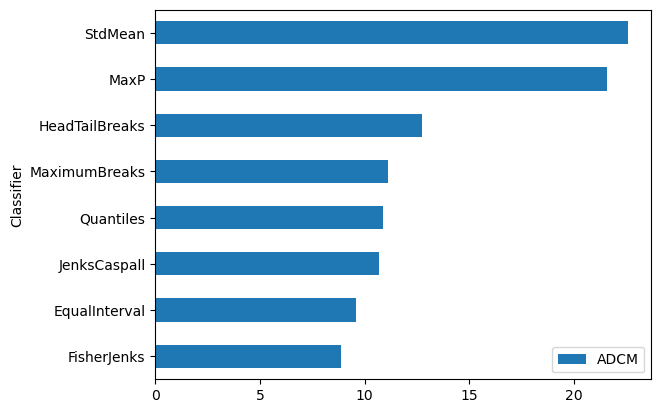

In [12]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [13]:
#Se corrio y para matri es mejor el msd
theMap['Total_msd_embara'] = msd.yb

In [14]:
K=5
theVar=theMap.Total_minMax_matri
# same interval width, easy interpretation
ei5_m = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd_m = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5_m=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data 
mb5_m = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht_m = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5_m = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5_m = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5_m = mapclassify.MaxP(theVar, k=K) 

In [15]:
class5_m = q5_m, ei5_m,msd_m, ht_m, mb5_m, fj5_m, jc5_m, mp5_m
# Collect ADCM for each classifier
fits_m = np.array([ c.adcm for c in class5_m])
# Convert ADCM scores to a DataFrame
adcms_m = pd.DataFrame(fits_m)
# Add classifier names
adcms_m['classifier'] = [c.name for c in class5_m]
# Add column names to the ADCM
adcms_m.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

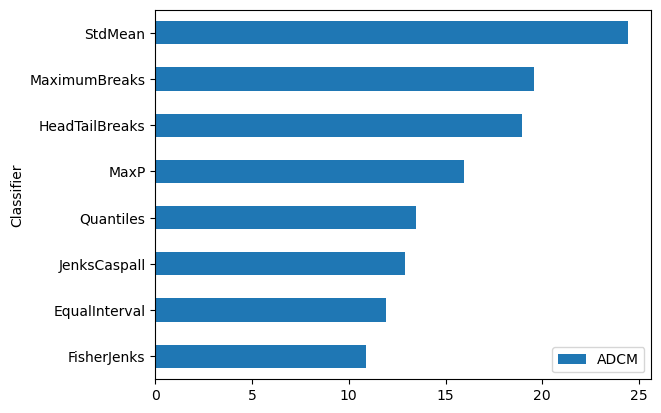

In [16]:
adcms_m.sort_values('ADCM').plot.barh(x='Classifier')

In [17]:
theMap['Total_msd_matri'] = msd_m.yb

In [18]:
changes={1:"Nivel Bajo", 2:"Nivel Medio", 3:"Nivel Alto", 4:"Nivel muy Alto"}
theMap[['Total_msd_embara_levels', 'Total_msd_matri_levels']]=theMap.loc[:,['Total_msd_embara','Total_msd_matri']].replace(to_replace=changes)
theMap

,IDDPTO,DEPARTAMEN,CAPITAL,FUENTE,geometry,embara,matri_in,Total_minMax_embara,Total_minMax_matri,Total_msd_embara,Total_msd_matri,Total_msd_embara_levels,Total_msd_matri_levels
0,01,AMAZONAS,CHACHAPOYAS,INEI,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",2.837393,34.200142,4.183324,7.112786,2,3,Nivel Medio,Nivel Alto
1,02,ANCASH,HUARAZ,INEI,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",0.601753,20.948143,0.887198,1.654621,1,2,Nivel Bajo,Nivel Medio
2,03,APURIMAC,ABANCAY,INEI,"POLYGON ((-73.74632 -13.17456, -73.74570 -13.1...",5.648242,27.332294,8.327513,4.284091,3,2,Nivel Alto,Nivel Medio
3,04,AREQUIPA,AREQUIPA,INEI,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",3.010771,17.019220,4.438944,0.036396,2,1,Nivel Medio,Nivel Bajo
4,05,AYACUCHO,AYACUCHO,INEI,"POLYGON ((-74.34843 -12.17503, -74.35000 -12.1...",2.198520,26.127815,3.241399,3.787997,2,2,Nivel Medio,Nivel Medio
5,06,CAJAMARCA,CAJAMARCA,INEI,"POLYGON ((-78.70034 -4.62769, -78.69817 -4.629...",3.208621,29.346756,4.730645,5.113798,2,2,Nivel Medio,Nivel Medio
6,07,CALLAO,CALLAO,INEI,"POLYGON ((-77.13521 -11.81782, -77.13516 -11.8...",3.100111,19.056759,4.570663,0.875607,2,1,Nivel Medio,Nivel Bajo
7,08,CUSCO,CUSCO,INEI,"POLYGON ((-72.97280 -11.25189, -72.97134 -11.2...",0.000000,25.541788,0.000000,3.546628,1,2,Nivel Bajo,Nivel Medio
8,09,HUANCAVELICA,HUANCAVELICA,INEI,"POLYGON ((-74.57118 -11.98710, -74.57095 -11.9...",2.915410,32.641472,4.298348,6.470809,2,2,Nivel Medio,Nivel Medio
9,10,HUANUCO,HUANUCO,INEI,"POLYGON ((-76.00486 -8.30517, -76.00301 -8.305...",0.988595,27.423325,1.457540,4.321585,2,2,Nivel Medio,Nivel Medio


In [19]:
theMap.to_file(os.path.join("mapas","PeruMapa.gpkg"), layer='peru', driver="GPKG")

In [20]:
#rescalando
theMap=theMap.to_crs(8858)
theMap['centroid']=theMap.geometry.centroid

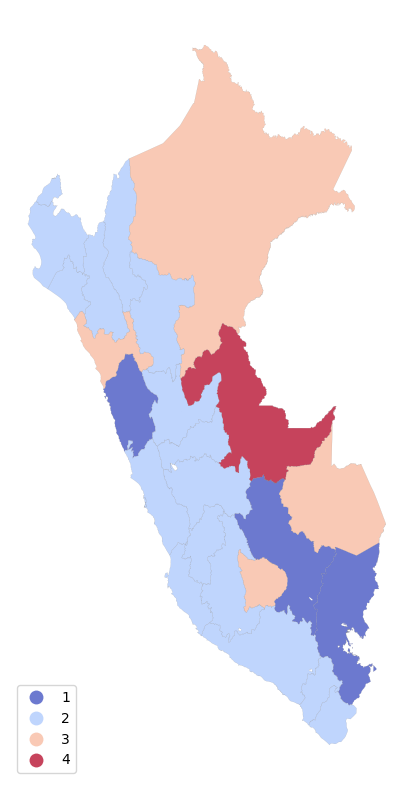

In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMap.plot(column='Total_msd_embara', 
        cmap='coolwarm', 
        categorical=True,
        edgecolor='grey', 
        linewidth=0.1, 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

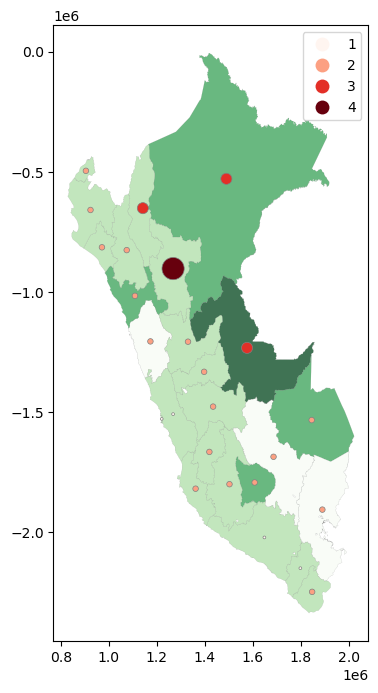

In [22]:
# just the plot

f, ax = plt.subplots(1, figsize=(8, 8))
base=theMap.plot(column='Total_msd_embara', 
        cmap='Greens', 
        categorical=True,
        edgecolor='grey', 
        linewidth=0.1, 
        alpha=0.75, 
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

# another column, with the size of the POINTS (based on "Total_ei5")
theMap["sizeOfMarker_msd_matri"]=[4**exp for exp in theMap["Total_msd_matri"]]

# now, plotting the centroids (declared as the geometry)!!!
mapa1 = theMap.set_geometry("centroid").plot(column="Total_msd_matri",
                                         categorical=True,
                                         markersize=theMap["sizeOfMarker_msd_matri"],
                                         cmap='Reds',
                                         edgecolor='grey',
                                         linewidth=0.5,
                                         legend=True,
                                         ax=base)
plt.savefig(os.path.join("imagenes","mapa1.png"))

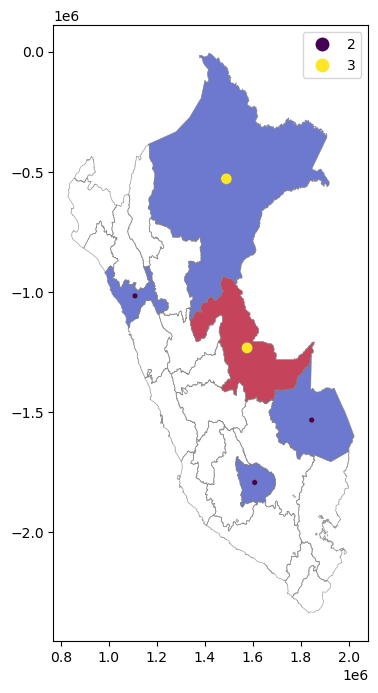

In [23]:
import seaborn as sns


f, ax = plt.subplots(1, figsize=(8, 8))

# Trazar todas las regiones en gris con bordes notables
theMap.boundary.plot(ax=ax, color='grey', linewidth=0.5, alpha=0.75)

# Filtrar las regiones con una alta tasa de embarazo (por ejemplo, con una tasa mayor a un cierto umbral)
umbral_embarazo = 2  # Ajusta el umbral según tus datos
regiones_altas_embarazo = theMap[theMap['Total_msd_embara'] > umbral_embarazo]

# Calcular el tamaño de los centroides basado en Total_msd_matri
regiones_altas_embarazo.loc[:, "sizeOfMarker_msd_matri"] = 4 ** regiones_altas_embarazo["Total_msd_matri"]


# Trazar solo las regiones con alta tasa de embarazo en verde
regiones_altas_embarazo.plot(column='Total_msd_embara', 
                             cmap='coolwarm', 
                             categorical=True,
                             edgecolor='grey',  # Establecer el color del borde en negro
                             linewidth=0.01,  # Aumentar el ancho del borde
                             alpha=0.75, 
                             legend=True,
                             legend_kwds={'loc': 3},
                             ax=ax
                            )

# Trazar los centroides solo en las regiones con alta tasa de embarazo con tamaños variables
regiones_altas_embarazo.set_geometry("centroid").plot(column="Total_msd_matri",
                                                      categorical=True,
                                                      markersize="sizeOfMarker_msd_matri",  # Tamaño variable basado en la nueva columna
                                                      cmap='viridis',
                                                      edgecolor='grey',  # Establecer el color del borde en negro
                                                      linewidth=0.3,  # Aumentar el ancho del borde
                                                      legend=True,
                                                      ax=ax
                                                     )


plt.savefig(os.path.join("imagenes","mapa2.png"))

In [24]:
plt.savefig(os.path.join("imagenes","mapa1.png"))
# save the map as image (create "images" folder first)
#plt.savefig(os.path.join("images",'Brasil_3layers.jpg'))

<Figure size 640x480 with 0 Axes>